In [ ]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from keras.datasets import cifar10
from tensorflow.keras.models import Model

In [ ]:
(x_train, y_train) , (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [ ]:
print('x_train shape - ',x_train.shape)
print('x_test shape - ',x_test.shape)
print('y_train shape - ',y_train.shape)
print('y_test shape - ',y_test.shape)

x_train shape -  (50000, 32, 32, 3)
x_test shape -  (10000, 32, 32, 3)
y_train shape -  (50000, 1)
y_test shape -  (10000, 1)


In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/255
x_test = x_test/255

In [ ]:
print (x_train.shape)
print (x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [ ]:

noise_factor = 0.1
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape) 
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape) 

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

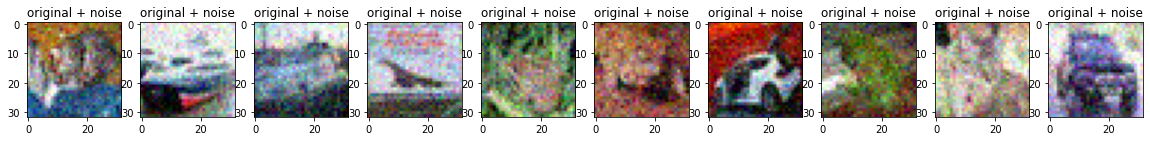

In [ ]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
plt.show()

In [ ]:
class Denoise(Model):
  def __init__(self):
    super(Denoise, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(32, 32, 3)), 
      layers.Conv2D(16, (3,3), activation='relu', padding='same', strides=2),
      layers.Conv2D(8, (3,3), activation='relu', padding='same', strides=2)])
    
    self.decoder = tf.keras.Sequential([
      layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2D(3, kernel_size=(3,3), activation='sigmoid', padding='same')])
    
  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Denoise()

In [ ]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [ ]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=29,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/29
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0094 - val_loss: 0.0052
Epoch 2/29
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0047 - val_loss: 0.0043
Epoch 3/29
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 4/29
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0034 - val_loss: 0.0032
Epoch 5/29
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0032 - val_loss: 0.0031
Epoch 6/29
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0031 - val_loss: 0.0031
Epoch 7/29
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0030 - val_loss: 0.0030
Epoch 8/29
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0030 - val_loss: 0.0030
Epoch 9/29
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0029 - val_loss: 0.0029
Epoch 10/29
1563/1563 [==============================] - 6s 4ms/step - loss: 0.002

In [ ]:
autoencoder.encoder.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 16, 16, 16)        448       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 8, 8, 8)           1160      
Total params: 1,608
Trainable params: 1,608
Non-trainable params: 0
_________________________________________________________________


In [ ]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

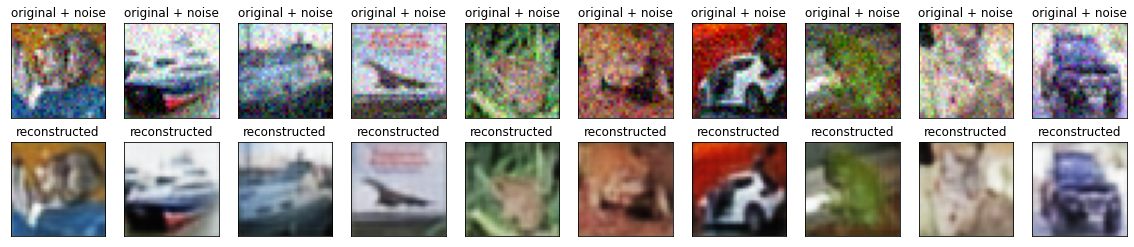

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):

  
    ax = plt.subplot(2, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

   
    bx = plt.subplot(2, n, i + n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()